### Exercise 4.2 Predicting Fuel Efficiency

In the Week 4 Exercise, you will build a linear regression model to predict fuel efficiency (miles per gallon) of automobiles. Download the auto-mpg.csv dataset from: Auto-mpg dataset.  
1. Load the data as a Pandas data frame and ensure that it imported correctly.  
2. Begin by prepping the data for modeling:  
    * Remove the car name column.  
    * The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.  
    * Create dummy variables for the origin column.
3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?  
4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.  
5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.  
6. Train an ordinary linear regression on the training data.  
7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.  
8. Pick another regression model and repeat the previous two steps. Note: Do NOT choose logistic regression as it is more like a classification model.  

In [1]:
# import libraries
import numpy as np
import pandas as pd

### 1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [2]:
# import data as pandas dataframe
df_mpg = pd.read_csv('auto_mpg.csv')

In [3]:
df_mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# shape of the dataset
df_mpg.shape

(398, 9)

In [5]:
# info of dataset
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
# Describe the dataset
df_mpg.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


### Remove the car name column.

In [7]:
df_mpg.drop(columns='car name', inplace=True)

In [8]:
df_mpg.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [9]:
df_mpg.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

### The horsepower column values likely imported as a string data type. Figure out why and replace any strings with the column mean.

In [10]:
# Find the values that are not numeric
df_mpg['test2'] = df_mpg.horsepower.str.isnumeric()

In [11]:
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,test2
0,18.0,8,307.0,130,3504,12.0,70,1,True
1,15.0,8,350.0,165,3693,11.5,70,1,True
2,18.0,8,318.0,150,3436,11.0,70,1,True
3,16.0,8,304.0,150,3433,12.0,70,1,True
4,17.0,8,302.0,140,3449,10.5,70,1,True
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,True
394,44.0,4,97.0,52,2130,24.6,82,2,True
395,32.0,4,135.0,84,2295,11.6,82,1,True
396,28.0,4,120.0,79,2625,18.6,82,1,True


In [12]:
# query to see the False non-numeric values
df_mpg.query('test2 == False')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,test2
32,25.0,4,98.0,?,2046,19.0,71,1,False
126,21.0,6,200.0,?,2875,17.0,74,1,False
330,40.9,4,85.0,?,1835,17.3,80,2,False
336,23.6,4,140.0,?,2905,14.3,80,1,False
354,34.5,4,100.0,?,2320,15.8,81,2,False
374,23.0,4,151.0,?,3035,20.5,82,1,False


In [13]:
# pass the NA to the horsepower column for values that are not numeric
df_mpg['horsepower'] = df_mpg['horsepower'].apply(pd.to_numeric, errors='coerce')

In [14]:
# pass the mean to a variable mean_hp
mean_hp = df_mpg['horsepower'].mean(skipna=True)

In [15]:
mean_hp

104.46938775510205

In [16]:
# use fillna to populate horsepower NAs with mean
df_mpg['horsepower'] = df_mpg['horsepower'].fillna(mean_hp)

In [17]:
# check NAs
df_mpg.query('test2 == False')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,test2
32,25.0,4,98.0,104.469388,2046,19.0,71,1,False
126,21.0,6,200.0,104.469388,2875,17.0,74,1,False
330,40.9,4,85.0,104.469388,1835,17.3,80,2,False
336,23.6,4,140.0,104.469388,2905,14.3,80,1,False
354,34.5,4,100.0,104.469388,2320,15.8,81,2,False
374,23.0,4,151.0,104.469388,3035,20.5,82,1,False


### Create dummy variables for the origin column.

In [18]:
df_mpg.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,test2
0,18.0,8,307.0,130.0,3504,12.0,70,1,True
1,15.0,8,350.0,165.0,3693,11.5,70,1,True
2,18.0,8,318.0,150.0,3436,11.0,70,1,True
3,16.0,8,304.0,150.0,3433,12.0,70,1,True
4,17.0,8,302.0,140.0,3449,10.5,70,1,True
5,15.0,8,429.0,198.0,4341,10.0,70,1,True
6,14.0,8,454.0,220.0,4354,9.0,70,1,True
7,14.0,8,440.0,215.0,4312,8.5,70,1,True
8,14.0,8,455.0,225.0,4425,10.0,70,1,True
9,15.0,8,390.0,190.0,3850,8.5,70,1,True


In [19]:
# create dummy variables for the origin 
dummy = pd.get_dummies(df_mpg['origin'], prefix='origin')
dummy.head()

,origin_1,origin_2,origin_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [20]:
# concat to the original dataframe
df_mpg_dummy = pd.concat([df_mpg, dummy], axis=1)
df_mpg_dummy

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,test2,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,True,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,True,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,True,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,True,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,True,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,True,1,0,0
394,44.0,4,97.0,52.0,2130,24.6,82,2,True,0,1,0
395,32.0,4,135.0,84.0,2295,11.6,82,1,True,1,0,0
396,28.0,4,120.0,79.0,2625,18.6,82,1,True,1,0,0


In [21]:
# Import more libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

In [22]:
# I honestly don't know why I created this because it's multiple columns but it was experience with iloc
# Creating variables
X = df_mpg_dummy.iloc[:, :-5].values
Y = df_mpg_dummy.iloc[:, :7].values

In [33]:
X

0      12.0
1      11.5
2      11.0
3      12.0
4      10.5
       ... 
393    15.6
394    24.6
395    11.6
396    18.6
397    19.4
Name: acceleration, Length: 398, dtype: float64

### 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

<AxesSubplot:>

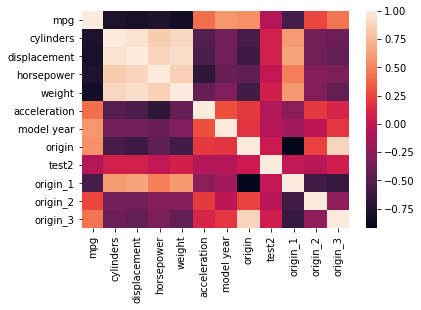

In [23]:
# created a heatmap to create a correlation of the data to compare with mpg
sns.heatmap(df_mpg_dummy.corr())

#### The features highly correlated with mpg based on the heatmap are:  
model year and origin, then acceleration

### 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

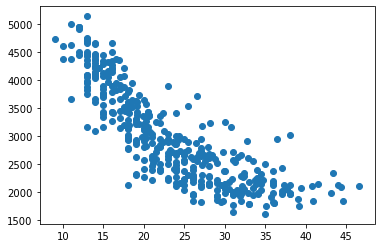

In [24]:
plt.scatter(df_mpg_dummy['mpg'], df_mpg_dummy['weight'])

#### The scatter plot agrees with the correlation comparison - as the weight (of the vehicle) increases, there is a decline in mpg. The heatmap shows a dark color on the scale which indicates a negative correlation

### 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [25]:
# Creating X and y
X = df_mpg_dummy['acceleration']
y = df_mpg_dummy['mpg']

In [26]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 0)

### 6. Train an ordinary linear regression on the training data.

In [27]:
# Take a look at the train dataset
X_train

64     13.5
55     19.0
317    15.8
102    21.0
358    18.3
       ... 
323    14.4
192    14.5
117    19.5
47     15.0
172    16.5
Name: acceleration, Length: 318, dtype: float64

In [28]:
y_train

64     15.0
55     27.0
317    34.3
102    26.0
358    31.6
       ... 
323    27.9
192    22.0
117    29.0
47     19.0
172    25.0
Name: mpg, Length: 318, dtype: float64

### Building and training the model

In [29]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_test_sm = sm.add_constant(X_test)

In [30]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

NameError: name 'X_train_sm' is not defined

### Now the Test Data

In [ ]:
# Adding a constant to get an intercept
X_test_sm = sm.add_constant(X_test)

In [ ]:
# Fitting the resgression line using 'OLS'
lrt = sm.OLS(y_test, X_test_sm).fit()

# Printing the parameters
lrt.params

### 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted for training
lr.summary()

### Training data  
R2 - How well the model fits the dependent variables  
R2 = 0.214 - 21% of the mpg variability can be explained by the acceleration column   

In [ ]:
# Calculate RMSE - Mean Square Error for Training data
# Root Mean Square Error is an absolute measure of the goodness for the fit
np.sqrt(metrics.mean_squared_error(X_train, y_train_pred))

In [ ]:
# Calculate MAE - Mean Absolute Error for Training data
# Represents average error
metrics.mean_absolute_error(X_train, y_train_pred)

In [ ]:
# Visualizing the regression line training
plt.scatter(X_train, y_train)
plt.plot(X_train, 2.7304 + 1.3324*X_train, 'r')
plt.show()

In [ ]:
# Predicting y_value using training data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

In [ ]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.histplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

In [ ]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

In [ ]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

The R2 score on the the test dataset based on the prediction is 0.0219, and the original training data was 0.214, and I would not conclude that this model is stable because the numbers should be within 5% of each other.

### Testing Data

In [ ]:
# Performing a summary to list out all the different parameters of the regression line fitted for testing
lrt.summary()

### Testing Data Values
R2 - How well the model fits the dependent variables  
R2 = 0.073 - 7.3% of the mpg variability can be explained by the acceleration column   

In [ ]:
# Visualizing the regression line testing
plt.scatter(X_test, y_test)
plt.plot(X_test, 12.1628 + 0.7280*X_test, 'r')
plt.show()

### Lasso Regression

In [ ]:
# Load library
from sklearn.linear_model import Lasso

In [ ]:
lX = df_mpg_dummy[['cylinders','displacement','horsepower','weight','acceleration','model year','origin_1','origin_2','origin_3']]
ly = df_mpg_dummy['mpg']

In [ ]:
# Splitting the variables as training and testing
from sklearn.model_selection import train_test_split
lX_train, lX_test, ly_train, ly_test = train_test_split(lX, ly, train_size = 0.8, 
                                                    test_size = 0.2, random_state = 0)

In [ ]:
# Run Lasso Regression
reg = Lasso(alpha=1)
reg.fit(lX, ly)

In [ ]:
# Getting R2 values
print('R squared training set', round(reg.score(lX_train, ly_train)*100, 2))
print('R squared test set', round(reg.score(lX_test, ly_test)*100, 2))

In [ ]:
# Get MSE values
# Training data
from sklearn.metrics import mean_squared_error

pred_train = reg.predict(lX_train)
mse_train = mean_squared_error(ly_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
pred = reg.predict(lX_test)
mse_test =mean_squared_error(ly_test, pred)
print('MSE test set', round(mse_test, 2))

### Conclusion and Obervations

When I did the linear regression on the mpg vs. acceleration - through the heat map I thought I had determined there was a correlation with with acceleration close to mpg. When I performed the linear regression, it didn't appear that th acceleration had much impact on the mpg. 
The Lasso Regression method uses shrinkage to "shrink" the data values toward a common value such as the mean. The results from this test shows more positive results related to the mpg comparing the other numerical values.
I can see where taking the time to run histograms and mapping out the data more to determine if there is any muticollinearity within the data points to be prepared with how the regression operations are going to handle it.